## TDI 12 Day Course Day 4: Pandas and Day 5: plotting
Emily E. Austin

In [60]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dat = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

In [6]:
dat.shape

(450, 26)

#### Question 1) 439 Companies represented in the data set

In [12]:
len(dat['Company Name'].unique())

439

# Question 2) 102 jobs created in Queens

In [10]:
dat['Job created'].groupby(dat['Borough']).sum()

Borough
Bronx             22.0
Brooklyn          25.0
New York           0.0
Queens           102.0
Staten Island      0.0
Name: Job created, dtype: float64

# Question 3) How many unique different email domains are there in the data set? 357 email domains

In [20]:
dat['domain'] = dat['company email'].str.split('@').str[1]
len(dat['domain'].unique())

357

# Question 4) Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA? 

In [44]:
nta_dat = dat[['NTA','Company Name','Total Savings', 'Job created']]
vc = nta_dat['NTA'].value_counts()
nta_dat = nta_dat[nta_dat['NTA'].isin(vc.index[vc.gt(4)])]
nta_dat.shape

nta = pd.DataFrame(nta_dat['Total Savings'].groupby(nta_dat['NTA']).mean())
nta['Job created'] = (nta_dat['Job created'].groupby(nta_dat['NTA']).sum())

nta

,Total Savings,Job created
NTA,,
Battery Park City-Lower Manhattan,469890.796667,0.0
Bushwick South,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,24337.390000,0.0
College Point,17159.372857,2.0
Crown Heights North,4036.298889,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,0.0
East New York,48433.093333,15.0
East Williamsburg,13990.626364,0.0
Greenpoint,9753.649286,0.0


# Question 5) Save your result for the previous question as a CSV file.

In [45]:
nta.to_csv('nta.csv')

## Day 5: Plotting
Using the same data set and results that you were working with in the pandas action items section (Day 4), create a

    scatter plot of jobs created versus average savings. 
    Use both a standard and a logarithmic scale for the average savings.
    histogram of the log of the average total savings.
    line plot of the total jobs created for each month.


In [46]:
import seaborn as sns

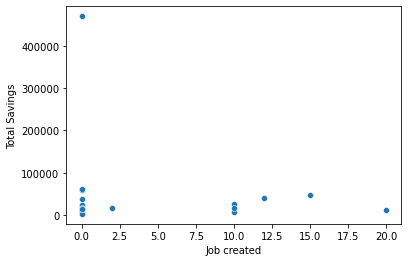

In [53]:
splot = sns.scatterplot(x=nta['Job created'],y=nta['Total Savings'])

[None]

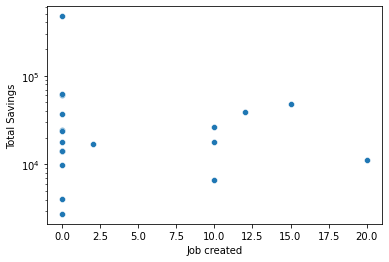

In [55]:
splot = sns.scatterplot(x=nta['Job created'],y=nta['Total Savings'])
splot.set(yscale="log")

Text(0.5, 1.0, 'Histogram of log(Total Average Savings)')

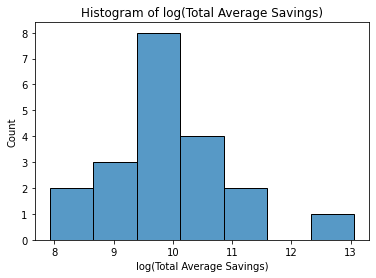

In [67]:
hplot = sns.histplot(np.log(nta['Total Savings']))
plt.xlabel("log(Total Average Savings)")
plt.title("Histogram of log(Total Average Savings)")

<AxesSubplot:xlabel='month', ylabel='Job created'>

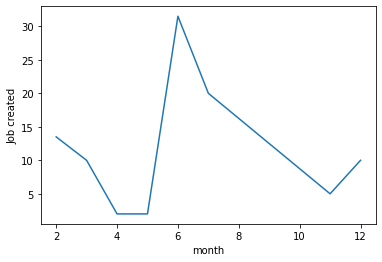

In [94]:
from datetime import datetime
dat ['Effective Date']=pd.to_datetime (dat['Effective Date'])
dat['month'] = dat['Effective Date'].dt.month
lpdat = dat['Job created'].groupby(dat['month']).mean()
lpdat = pd.DataFrame(lpdat)
lpdat
sns.lineplot(x="month", y = "Job created", data = lpdat)